C:\Users\sumithra.arumughan@sap.com\AppData\Local\Temp\ipykernel_36416\2557438384.py:11: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\sumithra.arumughan@sap.com\Desktop\loan.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,2.000000


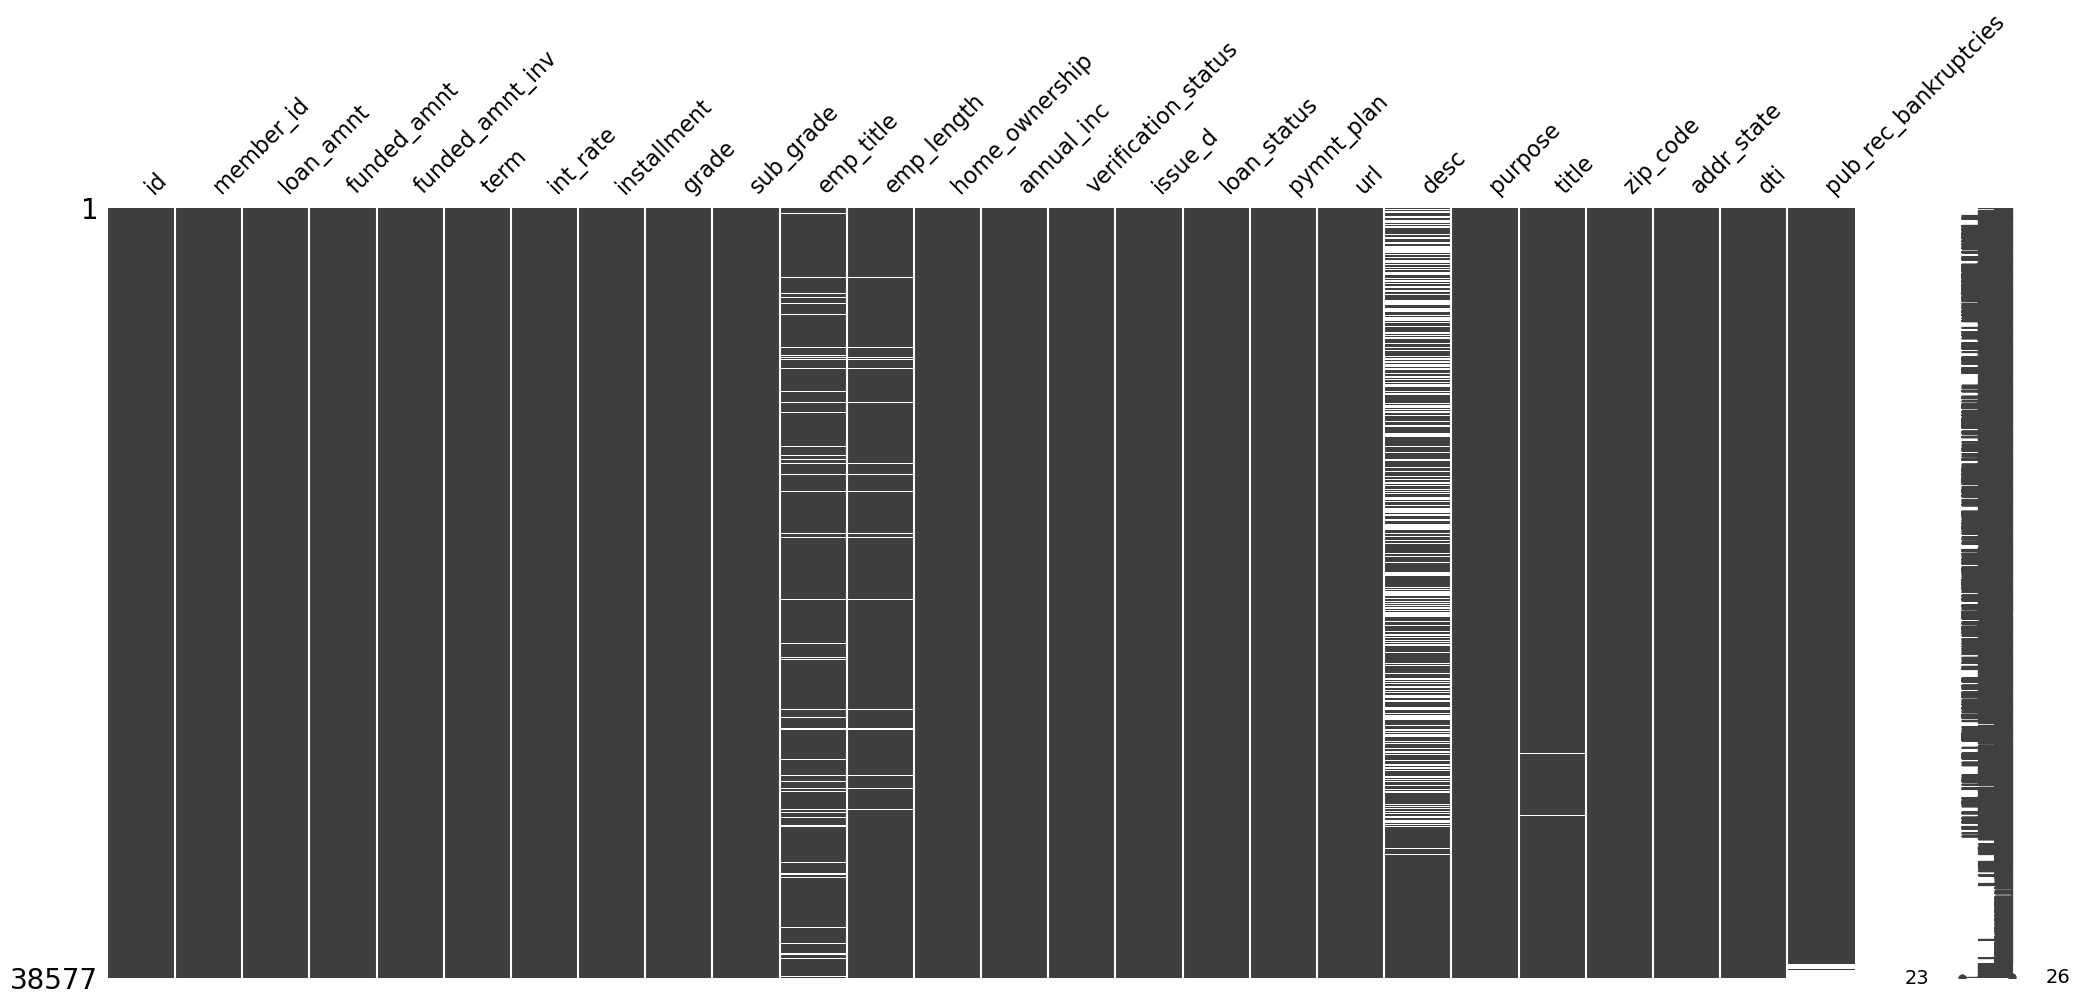

In [5]:
#Importing Pandas package
import pandas as pd
#Importing Numpy package
import numpy as np
# Importing missingno package
import missingno as msno

#Lending Club Case study

#Reading the CSV file using Pandas and converting it to the data frame
df = pd.read_csv(r'C:\Users\sumithra.arumughan@sap.com\Desktop\loan.csv')
 
#Sorting and collecting the data only for Fully paid and Charged Off
#We are removing the current loan status from the list since the current status indicates already a loan is going on and our 
#analysis is for the investors to decide on funding on accepted new loans
loan_status = ['Fully Paid','Charged Off']
Filter_df = df.loc[df['loan_status'].isin(loan_status)]

#Removing the customer behaviour variable because these variables are related to customer who is having current loan
#But our goal is to suggest the investor on new loan to borrowers with existing data

loan_df = Filter_df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type'],axis =1)
  
#Removing the columns where the null values precentage is greater than 90%
#In these columns only the values marked are NA
Final_loan = loan_df.drop(['annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'],axis =1)

msno.matrix(Final_loan)

Final_loan.info()
#Removing the months string from column 'term' for calculations
Final_loan['term'] = Final_loan['term'].str.replace('\D','',regex=True)
#Final_loan.head(10)
Final_loan1 = Final_loan.drop(['url','pymnt_plan','zip_code','desc','id','member_id'],axis=1)
#Removing the % symbol from interest rate
Final_loan1['int_rate'] = Final_loan1['int_rate'].str.replace('%','',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('years','',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('year','',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('<','-',regex=True)
Final_loan1['emp_length'] = Final_loan1['emp_length'].str.replace('+','0',regex=True)
Final_loan1.head(10)
Final_loan1.describe()